# How to read MSG SEVIRI data from the TROPOS archive?

This tutorial shows how to read MSG SEVIRI data using the MSevi data container class which is part of the python library collection tropy. The MSevi data container load sat.-data from hdf file without restrictions if they hdf is available and the region is inside the predefined 'eu'-domain. If not, then the MSevi class can also load the original HRIT files, but in this case no HRV input is implemented.

## Import Libraries

In [3]:
%matplotlib inline

import pylab as pl
import numpy as np
import datetime

from tropy.l15_msevi.msevi import MSevi


SEVIRI data are loaded into the MSevidata container. 

## Configuration

For configuration, we have to set region, scan_type and time (as object).

In [4]:
time = datetime.datetime( 2013, 6, 8, 12, 0)
region = 'eu'
scan_type = 'rss'

Initialize the Data Container.

In [5]:
s = MSevi(time = time, region = region, scan_type = scan_type)

## Load Infrared Channel

Start with the infrared channel at 10.8 um.

In [6]:
s.load('IR_108')

Region suggests use of hdf file


/vols/fs1/store/senf/.conda/python27mod/lib/python2.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


Now, the sat data are available as radiance (i.e. already converted from the counts using slope and offset). A dictionary s.rad is used to store the radiance information.

In [7]:
print (s.rad)

{'IR_108': array([[ 53.30927581,  51.46395473,  48.59345526, ...,  77.29844993,
         78.32362831,  80.9890921 ],
       [ 55.56466825,  53.10424014,  47.15820553, ...,  79.14377102,
         80.78405643,  81.19412778],
       [ 52.89920446,  49.20856229,  41.41720659, ...,  72.58262938,
         76.6833429 ,  79.75887804],
       ...,
       [134.70843927, 136.55376035, 137.16886738, ...,  99.23726728,
         99.44230296,  99.44230296],
       [135.11851062, 135.11851062, 136.34872468, ...,  99.44230296,
         99.23726728,  99.44230296],
       [135.3235463 , 135.11851062, 135.73361765, ...,  99.44230296,
         99.23726728,  99.44230296]])}


What you want for infrared channel is perhaps the brightness temperature (BT). To get it, the is the method rad2bt that creates a BT dictionary under s.bt

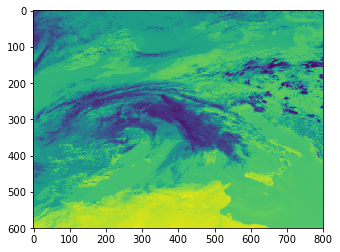

In [8]:
s.rad2bt('IR_108')
pl.imshow(s.bt['IR_108'])

# Adjusting Region Configuration

In [9]:
region = ((216, 456), (1676, 2076))
s = MSevi(time = time, region = region, scan_type = scan_type)

Region suggests use of hdf file


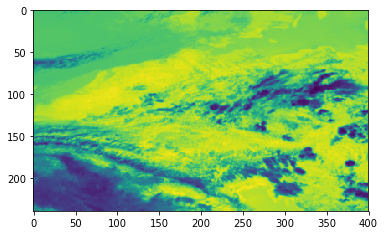

In [10]:
s.load('IR_108')
s.rad2bt('IR_108')
pl.imshow(s.bt['IR_108'])

# Getting geo-reference

The MSevi class also provides the method to read geo-reference, i.e. longitude and latitude, for the selected region cutout. The method is called s.lonlat() and the result is stored in the attributes s.lon and s.lat

In [11]:
s.lonlat()
print s.lon, s.lat

[[-0.3794155  -0.3231449  -0.26698685 ... 21.472942   21.529903
  21.58696   ]
 [-0.3580389  -0.30195236 -0.24592876 ... 21.446722   21.50356
  21.560478  ]
 [-0.33676338 -0.28081322 -0.22490978 ... 21.42049    21.47727
  21.53405   ]
 ...
 [ 2.335071    2.3752937   2.415495   ... 18.15725    18.197723
  18.238157  ]
 [ 2.3413725   2.3815722   2.421739   ... 18.149572   18.190002
  18.230433  ]
 [ 2.347673    2.3878417   2.427947   ... 18.141941   18.182312
  18.22275   ]] [[57.7341   57.731903 57.729946 ... 57.810207 57.81226  57.814465]
 [57.662613 57.660572 57.658646 ... 57.7384   57.740463 57.742657]
 [57.591175 57.58916  57.58723  ... 57.66635  57.668564 57.67074 ]
 ...
 [44.519314 44.518463 44.51767  ... 44.55012  44.551014 44.551758]
 [44.473633 44.47273  44.47193  ... 44.504284 44.505165 44.506012]
 [44.427914 44.42699  44.426296 ... 44.45857  44.459362 44.460358]]


Now, we plot again, but geo-referenced.

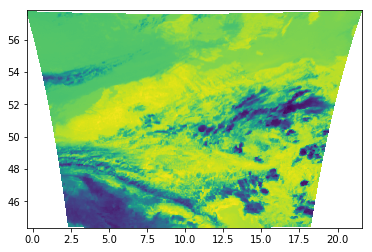

In [12]:
pl.pcolormesh(s.lon, s.lat, s.bt['IR_108'])

# Loading several channels

Now, we make a channel list and read all channels. The easied way is the get the default channel list from the msevi config. 

In [14]:
from tropy.l15_msevi.msevi_config import _narrow_channels
print _narrow_channels

full_channel_list = _narrow_channels + ['HRV',]

['VIS006', 'VIS008', 'IR_016', 'IR_039', 'WV_062', 'WV_073', 'IR_087', 'IR_097', 'IR_108', 'IR_120', 'IR_134']


In [15]:
s.load(full_channel_list)
print( s.rad.keys())

Region suggests use of hdf file
['HRV', 'WV_062', 'IR_097', 'WV_073', 'IR_039', 'IR_108', 'IR_087', 'VIS006', 'VIS008', 'IR_120', 'IR_134', 'IR_016']


Juchu! All channels are loaded! 

Now, we convert all IR channel radiances to BTs. No arg means all...

In [16]:
s.rad2bt()
print (s.bt.keys())

['WV_062', 'WV_073', 'IR_039', 'IR_108', 'IR_087', 'IR_097', 'IR_120', 'IR_134']


Time to explore the content. We loop over all IR channels...

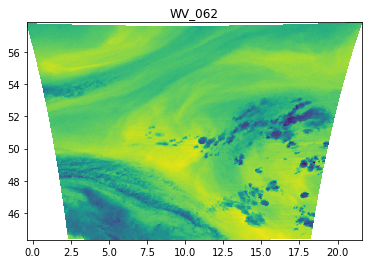

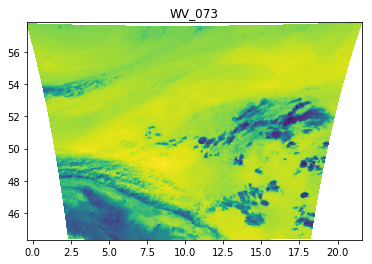

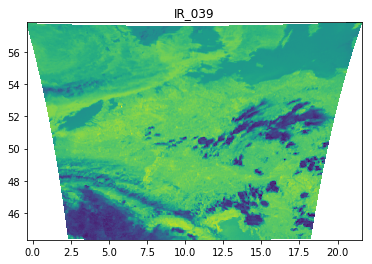

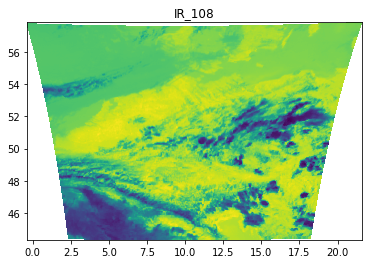

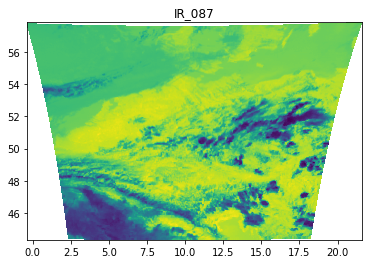

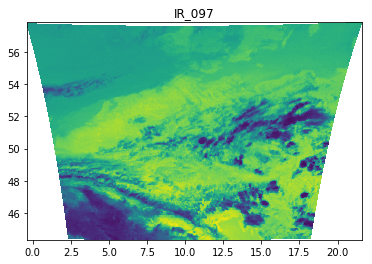

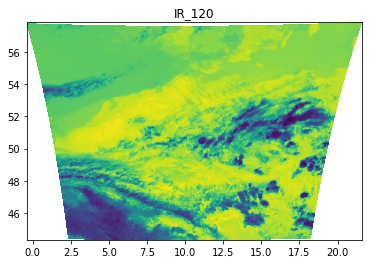

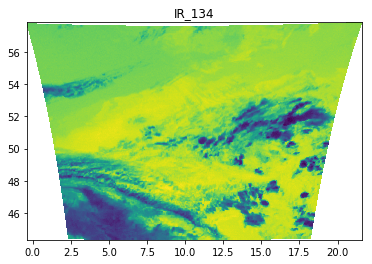

In [17]:
for chan_name in s.bt.keys():
    pl.figure()
    pl.pcolormesh(s.lon, s.lat, s.bt[chan_name])
    pl.title(chan_name)

Wow, what a welth of information ;-) 

But, visible is still missing, right? For this, there is the second conversion method called s.rad2refl that calculated reflectances. Note, no cos of solar zenith angle correction is applied here!

In [18]:
s.rad2refl()
print (s.ref.keys())

['VIS008', 'HRV', 'VIS006', 'IR_016']


Now, we plot the visible stuff.

First, the narrow-band channels. 

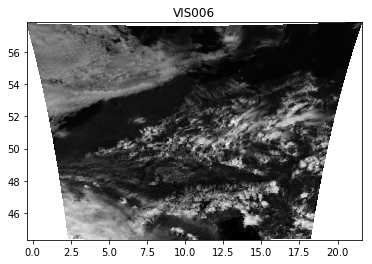

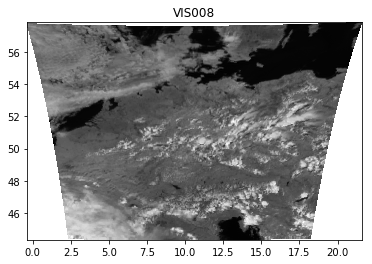

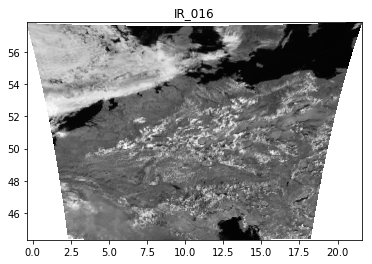

In [19]:
for chan_name in ['VIS006', 'VIS008', 'IR_016']:
    pl.figure()
    pl.pcolormesh(s.lon, s.lat, s.ref[chan_name], cmap = pl.cm.gray)
    pl.title(chan_name)

Sat-Images are really beautiful!

# HRV channel

We already loaded did all the input for HRV. We 
* loaded the radiances of the HRV channel
* converted them to reflectances
* and loaded georeference

With the narrow-band geo-ref, also a high-res geo-ref was calculated (just by linear interpolation). The high-res. lon and lat values are stored in the attributes s.hlon and s.hlat and can be used to plot and analyze HRV data

Text(0.5,1,'HRV')

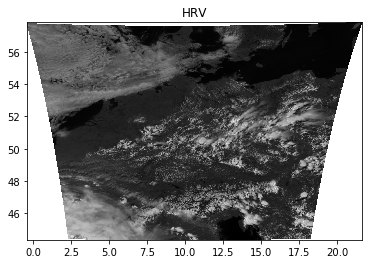

In [20]:
pl.pcolormesh(s.hlon, s.hlat, s.ref['HRV'], cmap = pl.cm.gray)
pl.title('HRV')

Great detail in there!